## LOADING THE DATASET

In [1]:
# importing the panda for laoding up the dataset
import pandas as pd

# Getting the column names
col_names = ["Classes", "Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium",
            "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
            "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

# loading the dataset up
wine = pd.read_csv("wine.data.csv", header=None, names=col_names)

In [2]:
wine.head()

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## ANALYSING THE DATA

In [3]:
# Making a dictionary of the correlation values to classes columns
corr_values = dict(wine.corr().iloc[:,0])

# Getting the column names with correlation values higher than 0.5
cols = []

for features, coef in corr_values.items():
    if features == "Classes":
        continue
    if coef > 0.5 or coef < -0.5:
        cols.append(features)

# Printing the features with a higher correlation 
print("The features with higher coorelation to classes:")
print(cols)

The features with higher coorelation to classes:
['Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


In [4]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
import numpy as np

# Splitting the data
X = wine[cols]
y = wine["Classes"]

# Scaling the data
for i in range(6):
    scaler = StandardScaler()
    X[cols[i]] = scaler.fit_transform(np.array(X[cols[i]]).reshape(-1,1))
    print(X[cols[i]].mean(), X[cols[i]].var())
    

-3.991813122247754e-17 1.0056497175141244
0.0 1.0056497175141241
-3.9918131222477537e-16 1.0056497175141244
1.9959065611238769e-16 1.0056497175141244
3.193450497798203e-16 1.0056497175141244
-1.5967252488991015e-16 1.0056497175141244


C:\Users\Ketan\AppData\Local\Temp\ipykernel_17280\2327849629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols[i]] = scaler.fit_transform(np.array(X[cols[i]]).reshape(-1,1))
C:\Users\Ketan\AppData\Local\Temp\ipykernel_17280\2327849629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols[i]] = scaler.fit_transform(np.array(X[cols[i]]).reshape(-1,1))
C:\Users\Ketan\AppData\Local\Temp\ipykernel_17280\2327849629.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

[]

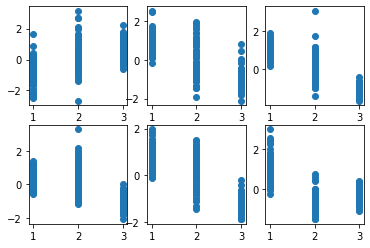

In [5]:
# So we've got the features now we visualize it
import matplotlib.pyplot as plt 

# Let's build a plot
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.scatter(y,X[cols[i-1]])
plt.plot()

## TRAINING CLASSIFIERS

In [6]:
# Training the different classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

# Training the classifier
clf = LogisticRegression().fit(X_train,y_train)

# Testing the classifier
print(accuracy_score(clf.predict(X_test), y_test))

1.0


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Classification Report")
print(classification_report(y_test,clf.predict(X_test)))

print("Confusion Matrix")
print(confusion_matrix(y_test, clf.predict(X_test)))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
